In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objects as go
plotly.offline.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3
from matplotlib import rc
import matplotlib.font_manager
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [2]:
# Global options

sns.set_style("white")
sns.set(font_scale=1.5, style="ticks")

height=15
aspect=1
x_jitter=0
y_jitter=0

# xlim=(0,14)
# ylim=(-14, 10)
alpha=1
marker='o'
s=10
legend=False
linewidth=0

In [8]:
ls 

counts.tsv


In [23]:
df = pd.read_csv("../results/counts/alignment_sorted_filtered_unique_mappers_reverse/counts.tsv",
                 header=0,
                 sep="\t")
df.set_index("Name", inplace=True)

In [24]:
df.head()

,counts_Input_WAGO-1_A,counts_Input_WAGO-1_B,counts_Input_WAGO-1_C,counts_Input_WAGO-1_dpf-3_null_A,counts_Input_WAGO-1_dpf-3_null_B,counts_Input_WAGO-1_dpf-3_null_C,counts_Input_WAGO-1_P3G_A,counts_Input_WAGO-1_P3G_B,counts_Input_WAGO-1_P3G_C,counts_Input_WAGO-3_A,...,counts_IP_WAGO-3_C,counts_IP_WAGO-3_dpf-3_null_A,counts_IP_WAGO-3_dpf-3_null_B,counts_IP_WAGO-3_dpf-3_null_C,counts_IP_WAGO-4_A,counts_IP_WAGO-4_B,counts_IP_WAGO-4_C,counts_IP_WAGO-4_dpf-3_null_A,counts_IP_WAGO-4_dpf-3_null_B,counts_IP_WAGO-4_dpf-3_null_C
Name,,,,,,,,,,,,,,,,,,,,,
I:10005952-10006427:+,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
I:10006437-10006683:+,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
I:1001335-1001573:-,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
I:10015772-10015842:+,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
I:1002040-1002265:-,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df.shape

(75398, 42)

In [26]:
conditions = list(df.columns)

# Library size

In [27]:
library_size = pd.DataFrame(df[conditions].sum())
library_size.reset_index(inplace=True)
library_size.columns = ["sample", "library_size"]
library_size.set_index("sample", inplace=True)

Text(0.5, 0, 'Number of reads')

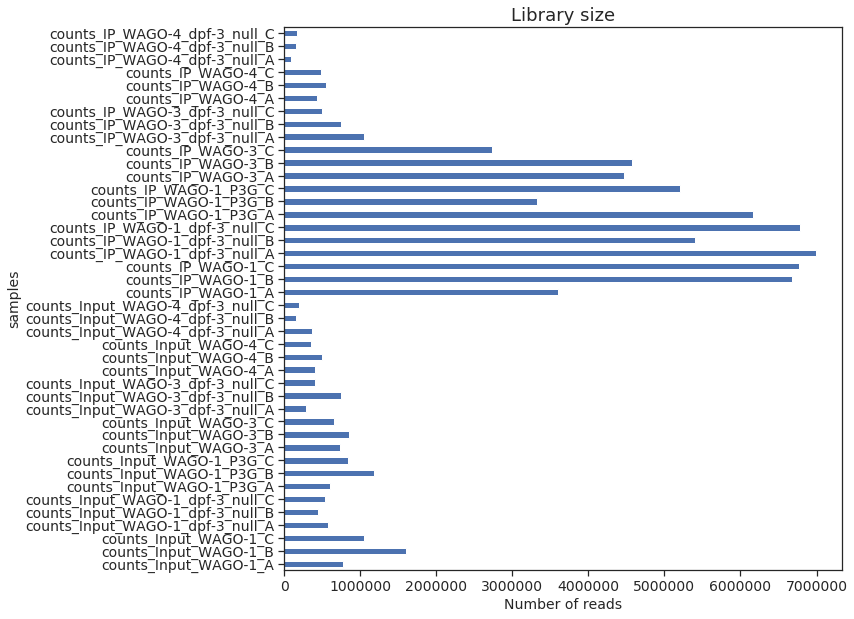

In [28]:
ax = library_size.plot(kind="barh", figsize=(10,10), title="Library size", legend=False, fontsize=14)
ax.set_ylabel("samples", fontsize=14)
ax.set_xlabel("Number of reads", fontsize=14)

In [15]:
library_size_full = library_size

# Library size 22G

In [10]:
df_22G = df[(df.index.str.startswith("G")) & (df.index.str.len()==22)]

In [11]:
library_size = pd.DataFrame(df_22G[conditions].sum())
library_size.reset_index(inplace=True)
library_size.columns = ["sample", "library_size"]
library_size.set_index("sample", inplace=True)

Text(0.5, 0, 'Number of reads')

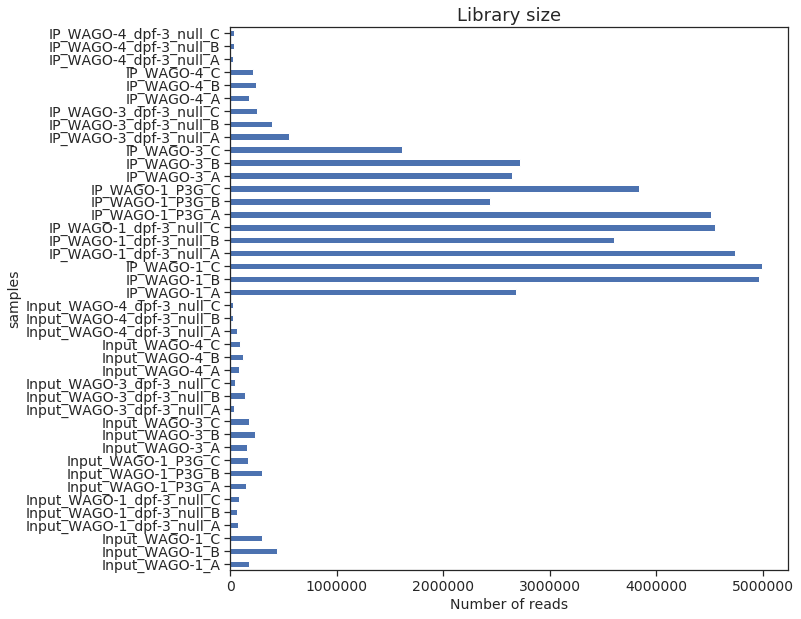

In [12]:
ax = library_size.plot(kind="barh", figsize=(10,10), title="Library size", legend=False, fontsize=14)
ax.set_ylabel("samples", fontsize=14)
ax.set_xlabel("Number of reads", fontsize=14)

# Normalize data for 22G RNAs

In [13]:
# filter
df_22G = df_22G[df_22G.sum(axis=1)>50]

In [14]:
# normalize (based on the total library size)
df_22G = (df_22G/df.sum(axis=0)) * (df.sum(axis=0).mean())
# pseudocount and log transform
df_22G = df_22G + 8
df_22G = np.log2(df_22G)

In [15]:
df_22G.shape

(96402, 42)

In [16]:
df_22G.head()

,Input_WAGO-1_A,Input_WAGO-1_B,Input_WAGO-1_C,Input_WAGO-1_dpf-3_null_A,Input_WAGO-1_dpf-3_null_B,Input_WAGO-1_dpf-3_null_C,Input_WAGO-1_P3G_A,Input_WAGO-1_P3G_B,Input_WAGO-1_P3G_C,Input_WAGO-3_A,...,IP_WAGO-3_C,IP_WAGO-3_dpf-3_null_A,IP_WAGO-3_dpf-3_null_B,IP_WAGO-3_dpf-3_null_C,IP_WAGO-4_A,IP_WAGO-4_B,IP_WAGO-4_C,IP_WAGO-4_dpf-3_null_A,IP_WAGO-4_dpf-3_null_B,IP_WAGO-4_dpf-3_null_C
Name,,,,,,,,,,,,,,,,,,,,,
GAAATGAATATCGTAGCTACAG,3.406937,3.557161,3.776975,3.000000,3.000000,3.000000,3.503985,3.000000,3.381350,3.000000,...,3.229553,4.617654,4.547219,4.292915,3.0,3.956953,3.0,3.0,3.000000,3.0
GTTTCTGACTCTAATTTTGCCC,3.723984,3.557161,3.776975,3.000000,4.121986,3.000000,4.172728,4.046696,3.682681,3.429246,...,3.119337,3.756670,3.400999,3.568916,3.0,3.000000,3.0,3.0,3.000000,3.0
GAGAAAAATCGACGAAAATCGG,3.723984,3.836423,3.964494,3.000000,4.121986,3.568637,3.876763,3.278768,4.329296,4.254667,...,3.331943,3.000000,3.000000,3.000000,3.0,3.000000,3.0,3.0,4.407686,3.0
GATTTTCGTCGATTTTTCTCAT,3.723984,4.174399,4.279215,3.000000,3.000000,3.000000,3.503985,3.713235,3.682681,3.000000,...,3.517204,4.383515,4.190101,3.568916,3.0,3.000000,3.0,3.0,3.000000,3.0
GAAAAAATGAGAAAAATCGACG,4.394701,4.271492,3.964494,3.532125,3.000000,3.568637,3.876763,4.831028,4.896481,4.028279,...,3.828731,4.103873,3.400999,3.000000,3.0,3.556408,3.0,3.0,3.000000,3.0


# PCA

In [17]:
df_22G.shape

(96402, 42)

In [18]:
scaled_data = preprocessing.scale(df_22G.T)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 42 Text xticklabel objects>)

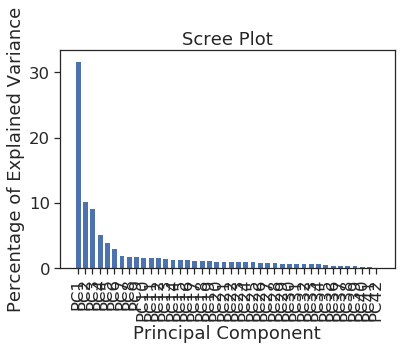

In [19]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.figure()
plt.rcParams["figure.figsize"] = (20,20)
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)    
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.xticks(rotation='vertical')

In [20]:
pca_df = pd.DataFrame(pca_data, index=[*df_22G], columns=labels)

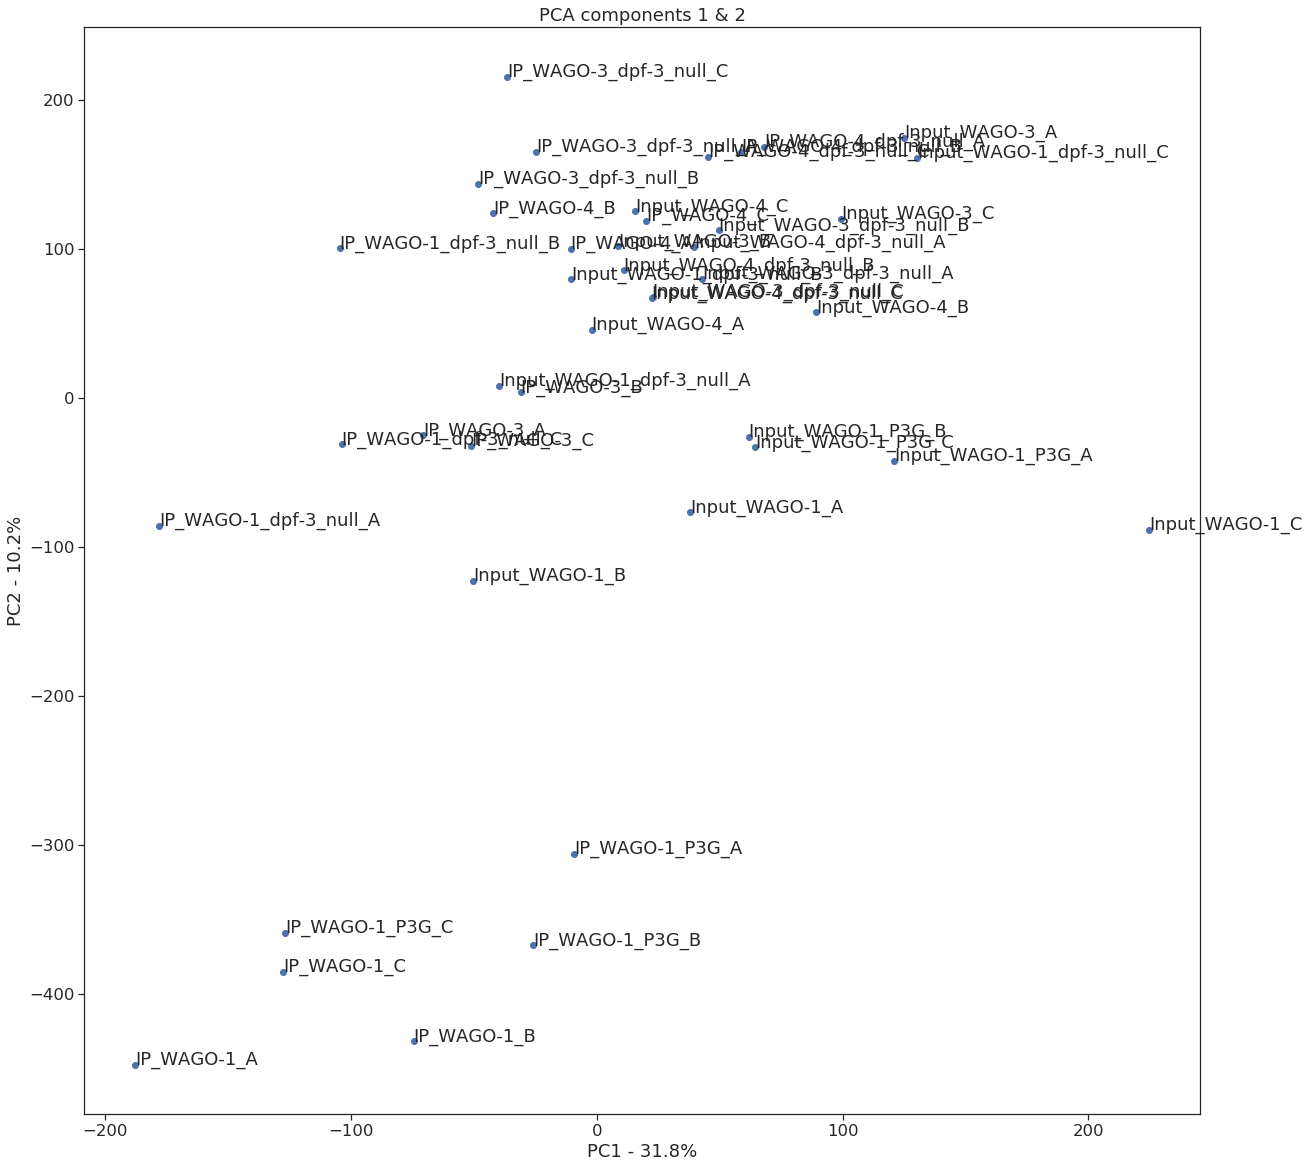

In [21]:
plt.figure()
plt.rcParams["figure.figsize"] = (20,20)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
plt.title('PCA components 1 & 2')
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

# Clustermap

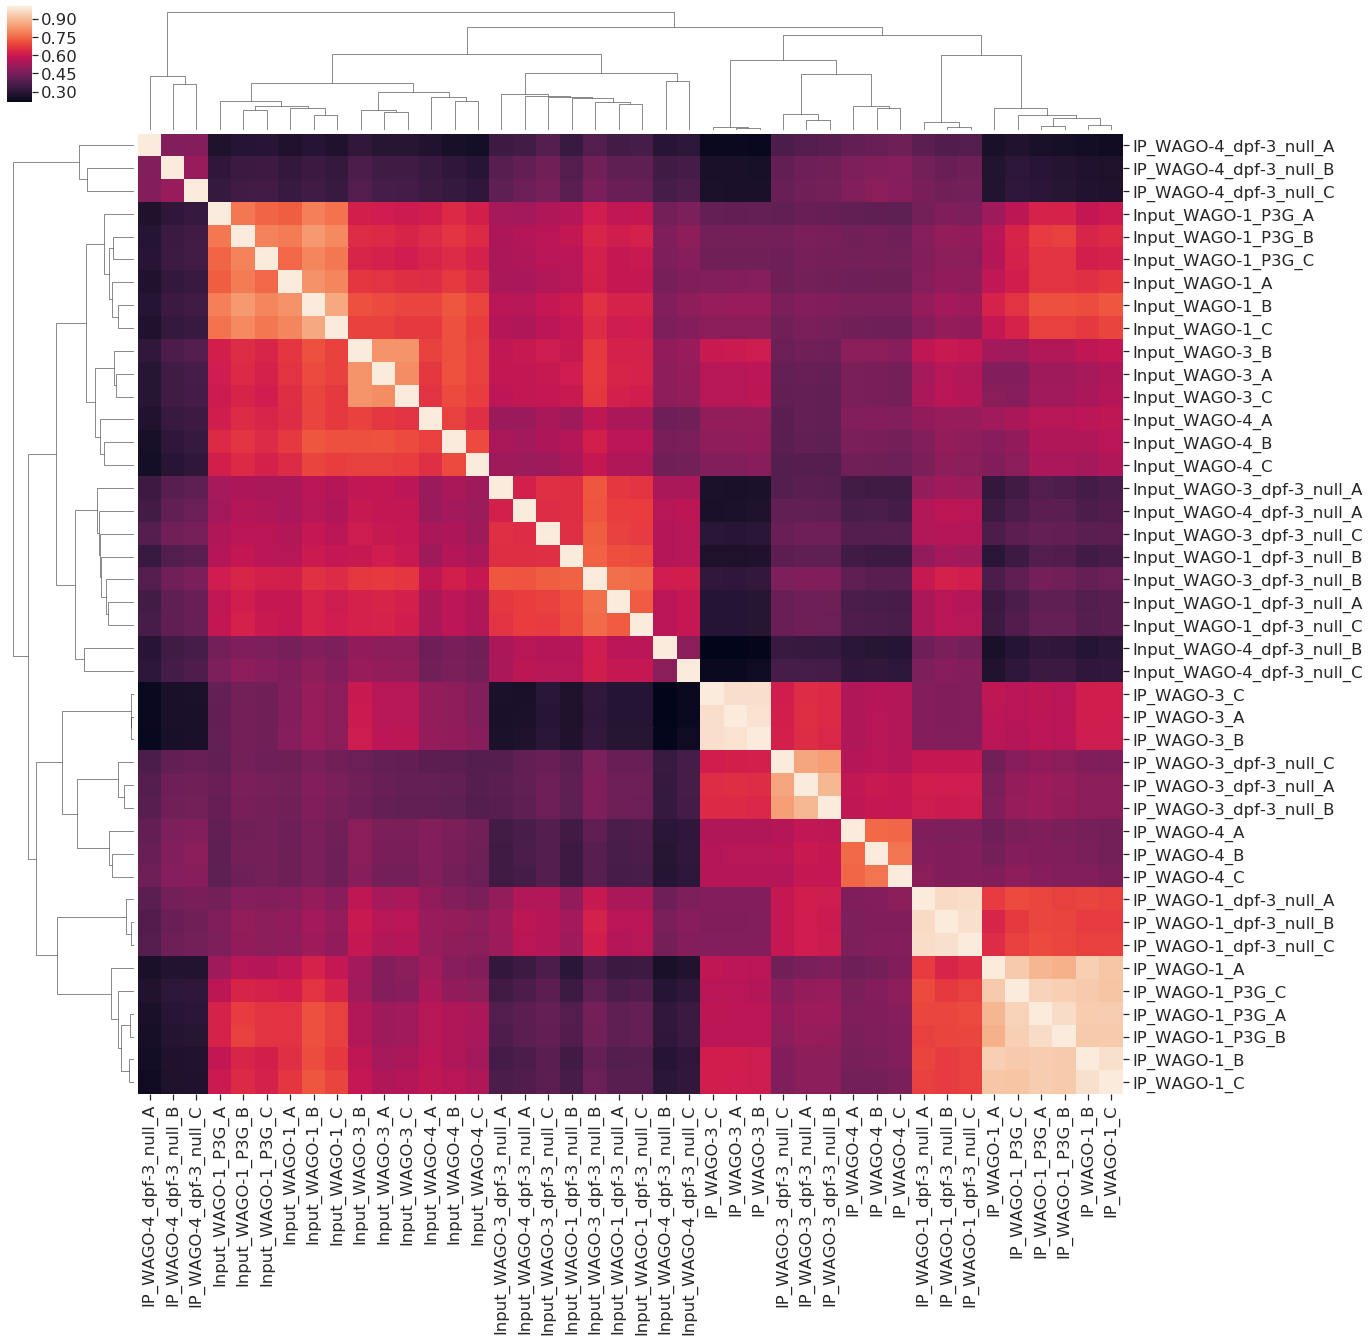

In [22]:
g = sns.clustermap(df_22G.corr(method="pearson"), figsize=(20,20))

# Pairplot and scatter plots

In [23]:
# sns.pairplot(df_22G[["wild_type_A", "wild_type_B", "wild_type_C", "wild_type_D", "wild_type_E", "wild_type_F", "Dpf_3_null_A",	"Dpf_3_null_B",	"Dpf_3_null_C", "Dpf_3_S784A_A", "Dpf_3_S784A_B", "Dpf_3_S784A_C"]])

In [24]:
# df_22G["log2(mean_WT)"] = df_22G[["wild_type_A", "wild_type_B", "wild_type_C", "wild_type_D", "wild_type_E", "wild_type_F"]].mean(axis=1)
# df_22G["log2(mean_Dpf_3_null)"] = df_22G[["Dpf_3_null_A",	"Dpf_3_null_B",	"Dpf_3_null_C"]].mean(axis=1)
# df_22G["log2(mean_Dpf_3_S784A)"] = df_22G[["Dpf_3_S784A_A", "Dpf_3_S784A_B", "Dpf_3_S784A_C"]].mean(axis=1)

In [25]:
# sns_plot = sns.scatterplot(x="log2(mean_WT)",
#                            y="log2(mean_Dpf_3_null)",
#                            data=df_22G,
#                            s=s,
#                            alpha=alpha,
#                            x_jitter=x_jitter,
#                            y_jitter=y_jitter,
#                            linewidth=linewidth)

In [26]:
# sns_plot = sns.scatterplot(x="log2(mean_WT)",
#                            y="log2(mean_Dpf_3_S784A)",
#                            data=df_22G,
#                            s=s,
#                            alpha=alpha,
#                            x_jitter=x_jitter,
#                            y_jitter=y_jitter,
#                            linewidth=linewidth)

In [27]:
# sns_plot = sns.scatterplot(x="log2(mean_Dpf_3_null)",
#                            y="log2(mean_Dpf_3_S784A)",
#                            data=df_22G,
#                            s=s,
#                            alpha=alpha,
#                            x_jitter=x_jitter,
#                            y_jitter=y_jitter,
#                            linewidth=linewidth)